## Imports

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import plotly.graph_objects as go


root = "../dataset/"

## Data Overview

In [92]:
# import physical data
df_physical_normal = pd.read_csv(os.path.join(root, "Physical dataset/phy_norm.csv"), encoding='utf-16-le', sep='\t')
df_physical_att_1 = pd.read_csv(os.path.join(root, "Physical dataset/phy_att_1.csv"), encoding='utf-16-le', sep='\t')
df_physical_att_2 = pd.read_csv(os.path.join(root, "Physical dataset/phy_att_2.csv"), encoding='utf-16-le', sep='\t')
df_physical_att_3 = pd.read_csv(os.path.join(root, "Physical dataset/phy_att_3.csv"), encoding='utf-16-le', sep='\t')
df_physical_att_4 = pd.read_csv(os.path.join(root, "Physical dataset/phy_att_4.csv"), encoding='utf-8-sig', sep=',')

We will rename all the columns to make them easier to work with.

In [93]:
# rename all df columns with the names of the first df
df_physical_att_1.columns = df_physical_normal.columns
df_physical_att_2.columns = df_physical_normal.columns
df_physical_att_3.columns = df_physical_normal.columns
df_physical_att_4.columns = df_physical_normal.columns

We will add a column named `attack_number` to be able to identify each attac

In [94]:
# Python
df_physical_normal['attack_number'] = 0
df_physical_att_1['attack_number'] = 1
df_physical_att_2['attack_number'] = 2
df_physical_att_3['attack_number'] = 3
df_physical_att_4['attack_number'] = 4

df_physical = pd.concat([df_physical_normal, df_physical_att_1, df_physical_att_2, df_physical_att_3, df_physical_att_4])

In [95]:
df_physical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10923 entries, 0 to 1716
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Time           10923 non-null  object
 1   Tank_1         10923 non-null  int64 
 2   Tank_2         10923 non-null  int64 
 3   Tank_3         10923 non-null  int64 
 4   Tank_4         10923 non-null  int64 
 5   Tank_5         10923 non-null  int64 
 6   Tank_6         10923 non-null  int64 
 7   Tank_7         10923 non-null  int64 
 8   Tank_8         10923 non-null  int64 
 9   Pump_1         10923 non-null  bool  
 10  Pump_2         10923 non-null  bool  
 11  Pump_3         10923 non-null  bool  
 12  Pump_4         10923 non-null  bool  
 13  Pump_5         10923 non-null  bool  
 14  Pump_6         10923 non-null  bool  
 15  Flow_sensor_1  10923 non-null  int64 
 16  Flow_sensor_2  10923 non-null  int64 
 17  Flow_sensor_3  10923 non-null  int64 
 18  Flow_sensor_4  10923 non-null  i

In [96]:
df_physical.head()

,Time,Tank_1,Tank_2,Tank_3,Tank_4,Tank_5,Tank_6,Tank_7,Tank_8,Pump_1,...,Valv_16,Valv_17,Valv_18,Valv_19,Valv_20,Valv_21,Valv_22,Label_n,Label,attack_number
0,09/04/2021 11:30:50,0,0,0,0,0,0,0,0,False,...,False,False,False,False,False,False,False,0,normal,0
1,09/04/2021 11:30:51,0,0,0,0,0,0,0,0,False,...,False,False,False,False,False,False,False,0,normal,0
2,09/04/2021 11:30:52,0,0,0,0,0,0,0,0,False,...,False,False,False,False,False,False,False,0,normal,0
3,09/04/2021 11:30:53,0,0,0,0,0,0,0,0,False,...,False,False,False,False,False,False,False,0,normal,0
4,09/04/2021 11:30:54,0,0,0,0,0,0,0,0,False,...,False,False,False,False,False,False,False,0,normal,0


Here we can see that the `time` column is not in the correct format. We will convert it to a `datetime` object. Also, we will change the `bool` columns to `int` type.

In [97]:
df_physical['Time'] = pd.to_datetime(df_physical['Time'], format='%d/%m/%Y %H:%M:%S')

In [98]:
# transform the bool values to int
for col in df_physical.columns:
    if df_physical[col].dtype == 'bool':
        df_physical[col] = df_physical[col].astype(int)
        
df_physical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10923 entries, 0 to 1716
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Time           10923 non-null  datetime64[ns]
 1   Tank_1         10923 non-null  int64         
 2   Tank_2         10923 non-null  int64         
 3   Tank_3         10923 non-null  int64         
 4   Tank_4         10923 non-null  int64         
 5   Tank_5         10923 non-null  int64         
 6   Tank_6         10923 non-null  int64         
 7   Tank_7         10923 non-null  int64         
 8   Tank_8         10923 non-null  int64         
 9   Pump_1         10923 non-null  int32         
 10  Pump_2         10923 non-null  int32         
 11  Pump_3         10923 non-null  int32         
 12  Pump_4         10923 non-null  int32         
 13  Pump_5         10923 non-null  int32         
 14  Pump_6         10923 non-null  int32         
 15  Flow_sensor_1  10923 non-

Now, let's analyse the different columns.

In [101]:
df_physical.describe()

,Time,Tank_1,Tank_2,Tank_3,Tank_4,Tank_5,Tank_6,Tank_7,Tank_8,Pump_1,...,Valv_15,Valv_16,Valv_17,Valv_18,Valv_19,Valv_20,Valv_21,Valv_22,Label_n,attack_number
count,10923,10923.000000,10923.000000,10923.000000,10923.000000,10923.000000,10923.000000,10923.000000,10923.000000,10923.000000,...,10923.000000,10923.0,10923.000000,10923.00000,10923.0,10923.000000,10923.0,10923.000000,10923.000000,10923.000000
mean,2021-05-31 13:31:42.056669184,723.644145,899.307791,590.142543,293.021148,367.792548,192.893344,183.938387,167.147304,0.357136,...,0.405658,0.0,0.525222,0.23034,0.0,0.610089,0.0,0.453355,0.184656,1.579969
min,2021-04-09 11:30:50,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,2021-04-09 12:16:20.500000,4.000000,62.500000,54.500000,25.000000,52.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
50%,2021-04-09 18:57:21,621.000000,945.000000,429.000000,35.000000,382.000000,174.000000,104.000000,88.000000,0.000000,...,0.000000,0.0,1.000000,0.00000,0.0,1.000000,0.0,0.000000,0.000000,1.000000
75%,2021-04-19 15:55:22.500000,1317.000000,1553.000000,966.000000,562.000000,611.500000,374.000000,377.000000,349.000000,1.000000,...,1.000000,0.0,1.000000,0.00000,0.0,1.000000,0.0,1.000000,0.000000,3.000000
max,2022-02-21 15:13:54,2021.000000,2012.000000,3427.000000,1261.000000,838.000000,800.000000,812.000000,507.000000,1.000000,...,1.000000,0.0,1.000000,1.00000,0.0,1.000000,0.0,1.000000,1.000000,4.000000
std,NaN,675.581394,687.809757,616.156955,355.376570,280.270322,174.180721,201.807666,181.470449,0.479177,...,0.491041,0.0,0.499386,0.42107,0.0,0.487752,0.0,0.497842,0.388036,1.429760


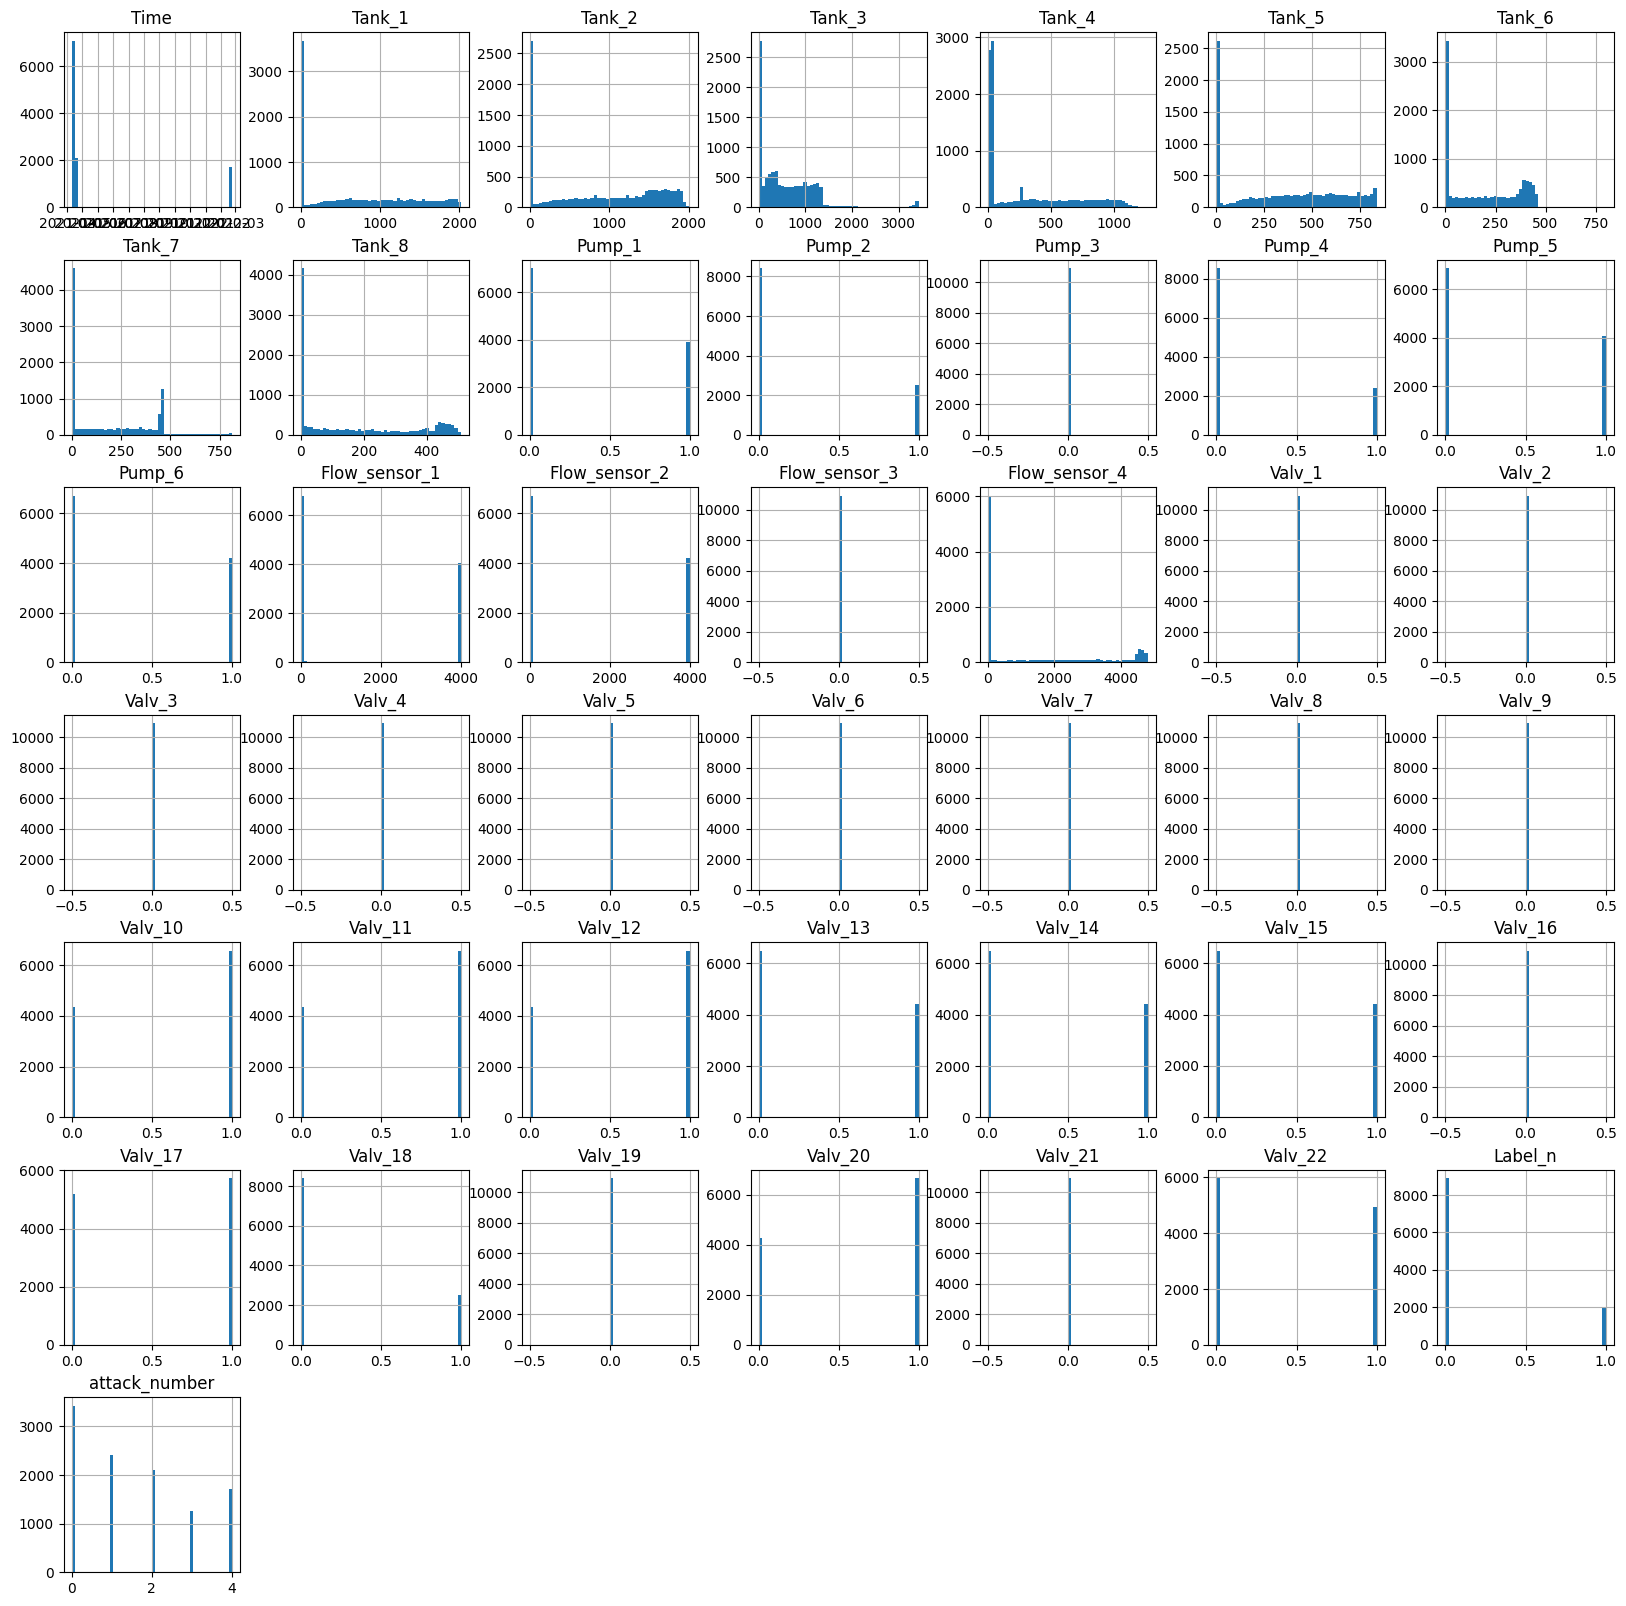

In [102]:
df_physical.hist(figsize=(20, 20), bins=50)
plt.show()

Here, we can see multiple columns with the same value for all the rows. We will drop them.

In [103]:
# delete the columns with only one value
for col in df_physical.columns:
    if len(df_physical[col].unique()) == 1:
        df_physical.drop(col, axis=1, inplace=True)

Here are the columns we decided to keep. We can see that they don't have any missing values.

In [104]:
df_physical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10923 entries, 0 to 1716
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Time           10923 non-null  datetime64[ns]
 1   Tank_1         10923 non-null  int64         
 2   Tank_2         10923 non-null  int64         
 3   Tank_3         10923 non-null  int64         
 4   Tank_4         10923 non-null  int64         
 5   Tank_5         10923 non-null  int64         
 6   Tank_6         10923 non-null  int64         
 7   Tank_7         10923 non-null  int64         
 8   Tank_8         10923 non-null  int64         
 9   Pump_1         10923 non-null  int32         
 10  Pump_2         10923 non-null  int32         
 11  Pump_4         10923 non-null  int32         
 12  Pump_5         10923 non-null  int32         
 13  Pump_6         10923 non-null  int32         
 14  Flow_sensor_1  10923 non-null  int64         
 15  Flow_sensor_2  10923 non-

Now let's analyse the different types of attacks.

In [105]:
print(df_physical.Label.value_counts())
print("-"*50)
print(df_physical.Label.value_counts() / len(df_physical))

Label
normal            8657
MITM              1008
physical fault     685
DoS                310
nomal              249
scan                14
Name: count, dtype: int64
--------------------------------------------------
Label
normal            0.792548
MITM              0.092282
physical fault    0.062712
DoS               0.028380
nomal             0.022796
scan              0.001282
Name: count, dtype: float64


We can see that the `nomal` column should be renamed to `normal`. Also the `scan` column is only 0.001% of the data. We will drop it.  
After that we will create a new column named `attack_type_number` that will map each attack type to a number.

In [106]:
df_physical['Label'] = df_physical['Label'].replace('nomal', 'normal')
df_physical = df_physical[df_physical['Label'] != 'scan']
df_physical['attack_type_number'] = df_physical['Label'].map({'normal': 0, 'MITM': 1, 'physical fault': 2, 'DoS': 3})

In [107]:
df_copy = df_physical.copy()

## Time Series

In [119]:
def plot_feature(df, feature, title):
    fig = px.line(df, x='Time', y=feature, color='Label', title=title)
    fig.show()
    
for attack_number in df_copy['attack_number'].unique():
    plot_feature(df_copy[df_copy['attack_number'] == attack_number], 'Tank_1', f'Tank_1 when attack_number is {attack_number}')


In [123]:
for attack_number in df_copy['attack_number'].unique():
    plot_feature(df_copy[df_copy['attack_number'] == attack_number], 'Tank_2', f'Tank_2 when attack_number is {attack_number}')

In [117]:
for attack_number in df_copy['attack_number'].unique():
    plot_feature(df_copy[df_copy['attack_number'] == attack_number], 'Flow_sensor_1', f'Flow_sensor_1 when attack_number is {attack_number}')


In [111]:
# same with Valv_11
for attack_number in df_copy['attack_number'].unique():
    plot_feature(df_copy[df_copy['attack_number'] == attack_number], 'Valv_11', f'Valv_11 when attack_number is {attack_number}')

## Correlation Analysis:

Now let's analyse the correlation between the different features.
The correlation measures the linear relationship between two variables. It is a number between -1 and 1. The closer the number is to 1, the more the two variables are positively correlated. The closer the number is to -1, the more the two variables are negatively correlated. If the number is close to 0, the two variables are not correlated.

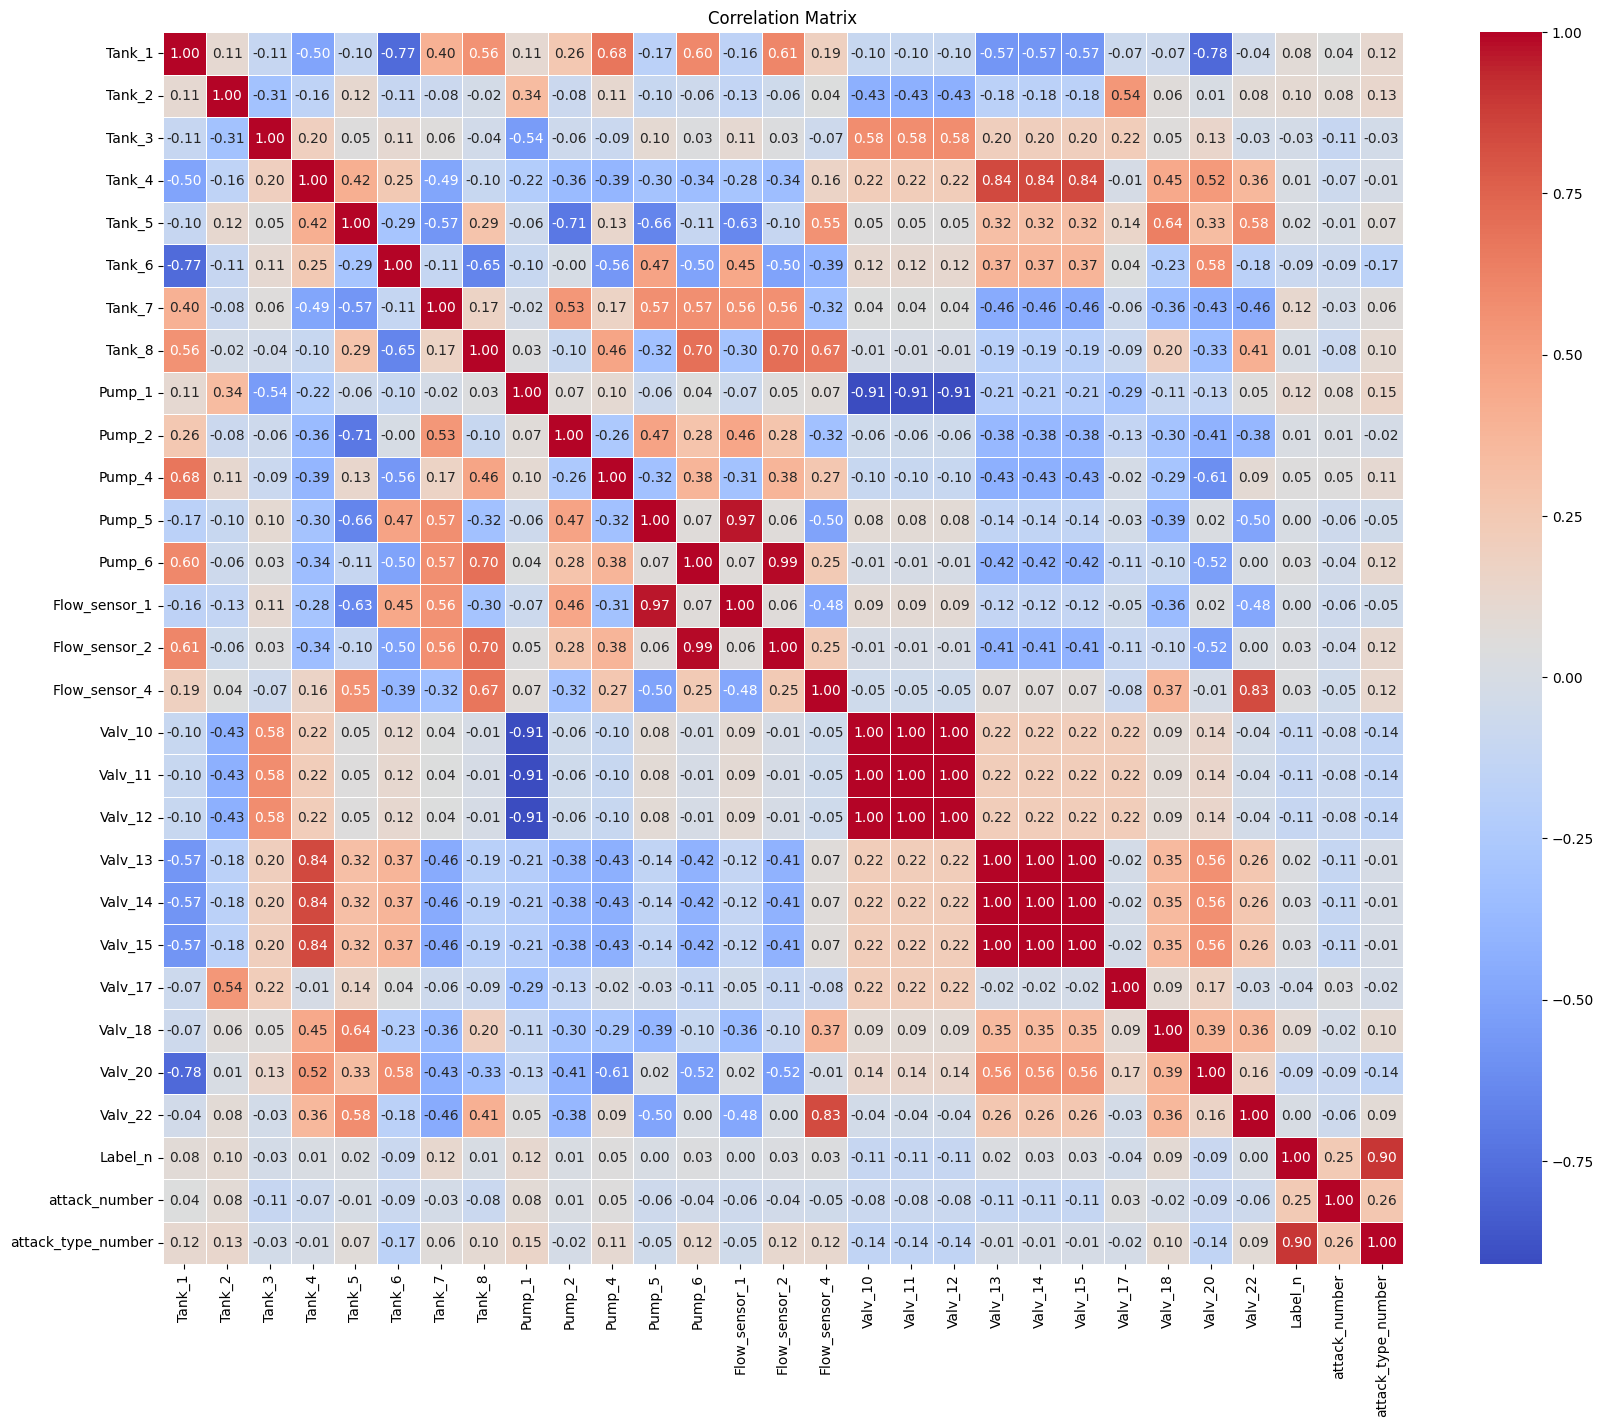

In [112]:
numeric_columns = df_physical.select_dtypes(include=[np.number]).columns
correlation_matrix = df_physical[numeric_columns].corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

- The strongest correlation is between Valv_10 and Valv_11 (1.00), which means that these two variables are perfectly correlated. This means that they always move in the same direction and at the same rate.  
- There are also very strong positive correlations between Pump 1 and Pump 2 (0.91), Pump 4 and Pump 5 (0.97), and Flow sensor 1 and Flow sensor 2 (0.99). This means that these pairs of variables are also very closely related.  
- There are some moderate positive correlations between other variables, such as Tank 1 and Tank 2 (0.11), Pump 1 and Flow sensor 1 (0.30), and Valv_10 and Valv_12 (0.22).  
- There are a few negative correlations, but they are all relatively weak. The strongest negative correlation is between Tank 5 and Valv_18 (-0.60), but this is still a moderate correlation.  

Overall, the correlation matrix suggests that the system we are studying is highly interconnected.  

Here are the conclusions we can draw from all this :

- Valv_10 and Valv_11 are likely to be controlled by the same system, as they are perfectly correlated.
- Pump 1 and Pump 2, Pump 4 and Pump 5, and Flow sensor 1 and Flow sensor 2 are also likely to be controlled by the same systems, as they are very strongly correlated.
- Tank 1 and Tank 2 are likely to be connected, but the relationship is more complex, as the correlation is weaker.
- Tank 5 and Valv_18 may be inversely related, but the relationship is also relatively weak.

> **N.B:** It is important to note that correlation does not equal causation. Just because two variables are correlated does not mean that one causes the other. More research would be needed to determine the causal relationships between the variables in this system.



## Feature Relationships:

Now let's analyse the relationships between the different features.  
We will not use the scatter_matrix function because it is too slow with a large number of features. Instead, we will focus on the features that are most correlated with the target variable.

In [113]:
def plot_feature_feature(feature_1, feature_2, df):
    fig = go.Figure()

    # plot feature_1 in blue and feature_2 in green
    fig.add_trace(go.Scatter(y=df[feature_1], mode='lines', name=feature_1, line=dict(color='blue')))
    fig.add_trace(go.Scatter(y=df[feature_2], mode='lines', name=feature_2, line=dict(color='green')))

    fig.update_layout(title=f'{feature_1} vs. {feature_2}', xaxis_title=feature_1, yaxis_title=feature_2)

    fig.show()
    

# Example usage:
feature_1_example = 'Valv_10'
feature_2_example = 'Valv_11'
plot_feature_feature(feature_1_example, feature_2_example, df_physical)

feature_1_example = 'Tank_5'
feature_2_example = 'Valv_18'
plot_feature_feature(feature_1_example, feature_2_example, df_physical)

## Machine Learning:

Let's predict if it's a normal or abnormal state of the system.  

Then we're gonna try to check which attack is happening.

In [114]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [115]:
data = df_physical.copy()

In [120]:
X = data.drop(['Label', 'Label_n', 'Time','attack_number','attack_type_number'], axis=1)
y = data['Label_n']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
decision_tree = DecisionTreeClassifier()

In [ ]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = decision_tree.predict(X_test)

In [ ]:
# Step 6: Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1700   39]
 [  35  408]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1739
           1       0.91      0.92      0.92       443

    accuracy                           0.97      2182
   macro avg       0.95      0.95      0.95      2182
weighted avg       0.97      0.97      0.97      2182



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

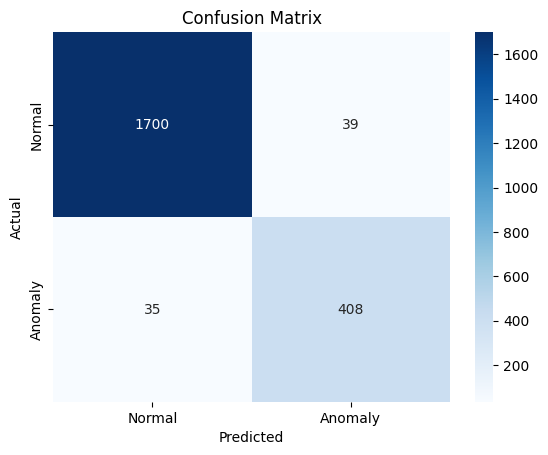

In [ ]:
# Confusion Matrix Plot
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# ROC Curve and AUC
y_probs = decision_tree.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

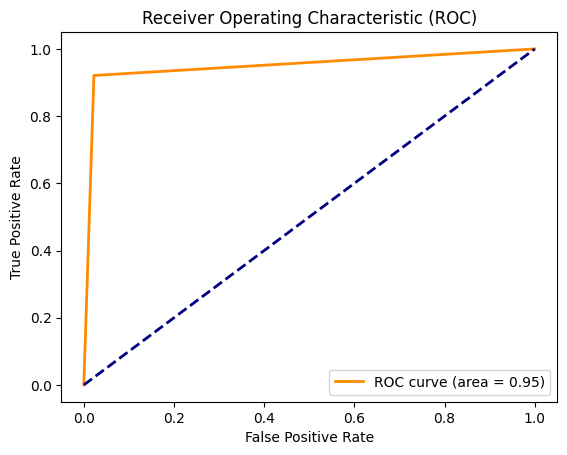

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming X contains your features and y contains the target variable (attack type)
y = df_physical['attack_type_number']  # Assuming 'attack_type_number' is the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose and train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)


Accuracy: 0.9715857011915674
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1739
           1       0.90      0.94      0.92       210
           2       0.94      0.91      0.93       163
           3       0.96      0.94      0.95        70

    accuracy                           0.97      2182
   macro avg       0.95      0.95      0.95      2182
weighted avg       0.97      0.97      0.97      2182



The other algorithms we tried are :

- KNeighborsClassifier
- DecisionTreeClassifier
- RandomForestClassifier
- XGBoostClassifier
- SVC
- MLPClassifier

They are showcased in the streamlit app.

In [ ]:
# save the df
df_physical.to_csv(os.path.join(root, "Physical dataset/physical_analysed.csv"), index=False)